In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('data\original\Online Harassment Dataset\onlineHarassmentDataset.tdf', delimiter='\t', encoding='latin-1', usecols=['Tweet', 'Code'])
df.to_csv('data\original\onlineHarassmentDataset.csv', index=False, encoding='latin-1')


In [1]:
with open('data\original\Online Harassment Dataset\onlineHarassmentDataset.tdf') as f:
    print(f)

<_io.TextIOWrapper name='data\\original\\Online Harassment Dataset\\onlineHarassmentDataset.tdf' mode='r' encoding='cp1252'>


In [17]:
df1 = pd.read_csv('data\original\onlineHarassmentDataset.csv', encoding='latin-1')

In [44]:
import re
text = 'RT rt rt RT adfs RT'
text = re.sub(r'(?<=\s)rt(?=\s)|\Art(?=\s)|(?<=\s)rt\Z', r' ', text, flags=re.IGNORECASE)
from src.utils.cleaning import remove_excess_spaces, remove_space_at_beginning_or_end

text = remove_excess_spaces(text)
text = remove_space_at_beginning_or_end(text)
text



'adfs'

In [15]:
df = pd.read_csv('data/original/TweetBLM (1).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/original/TweetBLM (1).csv'

In [31]:
df = pd.DataFrame([(1, 'a'),(2, 'b')], columns=['nums', 'letters'])

In [35]:
a = df.iloc[:, 0]

In [36]:
a = [5,6]

In [37]:
df


,nums,letters
0,3,a
1,4,b


In [6]:
df.sort_values('first', ascending=False)

,first
3,4
2,3
1,2
0,1


In [12]:
m = []
a = [1,2,3]
m += a
m

[1, 2, 3]

In [ ]:
pd.DataFrame(columns=['a', 'b'])

In [9]:
with open('data/original/cyberbullying_tweets/8000age.txt', 'r', encoding='utf-8') as f:
    a = f.read()
    
a = a.split('\n')
print(a[2])

There was a girl in my class in 6th grade who was a little autistic, and her parents thought it’d be better to send her to a public school. She didn’t fit in with the class and was lowkey bullied (it was actually high key but the teacher downplayed it and did nothing)


In [87]:
import pandas as pd

df = pd.read_csv('C:\\Users\\rooty\\UWEC\\Research\\CyberBullyingML\\venv\\cyberbullying-ml\\data\\original\\48000_cyberbullying_tweets.csv')



In [96]:
df.dropna(inplace=True)

In [95]:
df.drop_duplicates(inplace=True)

In [97]:
df.tweet = df.tweet.astype('str')  

In [98]:
df.tweet.dtype

dtype('O')

In [45]:
df.iloc[:,0][48005]

nan

In [82]:
df = pd.DataFrame([[1,2]], columns=['one', 'second'])

In [83]:
df.one is df.iloc[:,0]

False

In [66]:
df.iloc[:,0] = df['tweet']

<Axes: >

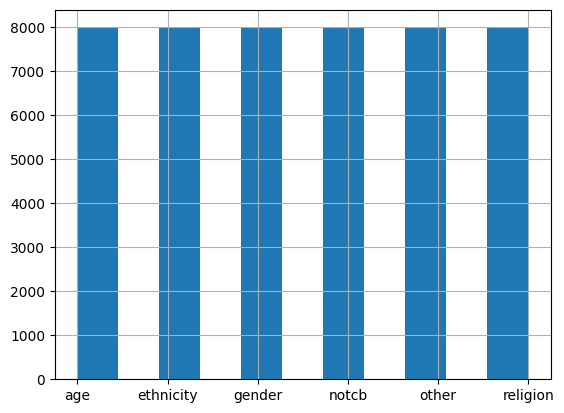

In [74]:
df.label.hist(bins=11)

In [67]:
df.iloc[:,0] is df['tweet']

False

In [99]:
import pandas as pd

df = pd.read_csv('C:\\Users\\rooty\\UWEC\\Research\\CyberBullyingML\\venv\\cyberbullying-ml\\data\\original\\hatespeech_tweets.csv')


In [100]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
df = pd.read_csv('C:\\Users\\rooty\\UWEC\\Research\\CyberBullyingML\\venv\\cyberbullying-ml\\data\\original\\hatespeech_tweets.csv')
from xgboost import XGBClassifier



In [16]:
N_FOLDS = 2
RANDOM_SEED = 115
x_train, x_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.5, shuffle=True, random_state=RANDOM_SEED)


In [19]:
vectorizer = CountVectorizer()
x_train = vectorizer.fit_transform(x_train)
cross_val_score(XGBClassifier(), x_train, y_train, cv=N_FOLDS, scoring='accuracy')


array([0.89928986, 0.90411622])